# Develop Robot keyword base on OOP
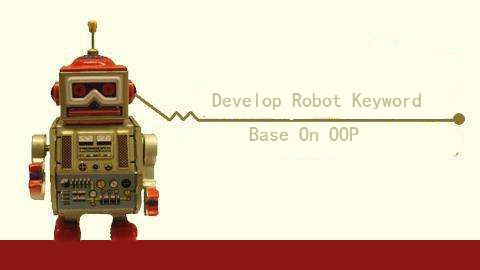
## <center>wang liyao (leo)</center>

## what's OOP

[OOP](https://en.wikipedia.org/wiki/Object-oriented_programming), an object-oriented programming method, was a popular software  
programming method in the 1990s.  
It emphasizes "abstraction", "encapsulation", "inheritance" and  
"polymorphism" of objects.

OOP just like mall different component have different functionality
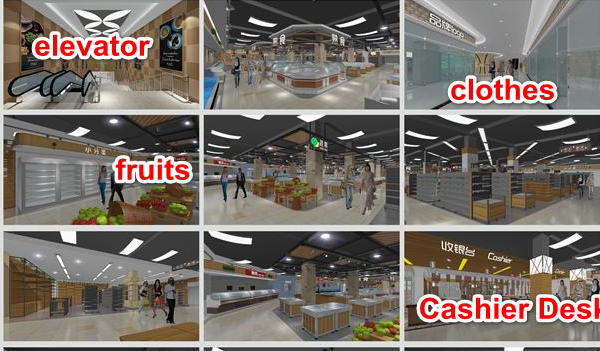

## why we need OOP

** 1. maintainability **  
** 2. Extensibility **  
** 3. reusability **

** 4. most important of all:  
OOP has a good reputation and we have a heart for excellence  
OOP 口碑好 而且我们有一颗追求卓越的心  
**

## robot keyword  & OOP

1. Robot was developed by python
2. Robot keyword can developed by python
3. Robot itself is also a programming language.  
It is a language for users to write demand stories  
Demand story is like narration.  
It's a process oriented thing.  
We can easily write process case

## Low-level keyword development demo

### execute shell command keyword

** implement a keyword to execute shell command on remote linux pc **

** 实现一个可以在远程linux系统的pc上执行shell 命令的keyword **

### Procedure Oriented Programming

In [ ]:
#interface.py

import paramiko
def execute_shell_command(cmd, host, username, password):
    ssh = paramiko.SSHClient()
    ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
    ssh.connect(host, 22, username, password)
    stdin,stdout,stderr = ssh.exec_command(cmd)
    outmsg, errmsg = stdout.read(),stderr.read()
    ssh.close()
    return outmsg

### add requirement

but one day, our customer need two keywords:
1. “get ethernet port ip”,input arguments: ethernet name, output: ip address
2. "get remote host name", output: host name

In [ ]:
#interface.py

import paramiko
import re

def get_ethernet_ip_address(eth_name, host, username, password):
    search_command = 'sudo ifconfig {}'.format(eth_name)
    result = execute_shell_command(search_command, host, username, password)
    pattern = r"inet addr:(\d{1,4}.\d{1,4}.\d{1,4}.\d{1,4})"
    for line in stdout.split('\n'):
        ret = re.search(pattern, line)
        if ret:
            result = ret.groups()[0]
    return result

def get_host_name(host, username, password):
    command = "hostname"
    result = execute_shell_command(command)
    return result.strip()


def execute_shell_command(cmd, host, username, password):
    ssh = paramiko.SSHClient()
    ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
    ssh.connect(host, 22, username, password)
    stdin,stdout,stderr = ssh.exec_command(cmd)
    outmsg, errmsg = stdout.read(),stderr.read()
    ssh.close()
    return outmsg


### change requirement again

** If one day user find get_ethernet_ip_address keyword use too much time  
when execute command in local pc, it seems not necessary via ssh execute  
local comand ** 

In [ ]:
#interface.py

import paramiko
import subprocess
import re

def get_ethernet_ip_address(eth_name, host, username, password):
    search_command = 'sudo ifconfig {}'.format(eth_name)
    if host == '127.0.0.1' or host == 'localhost':
        result = execute_local_command(search_command)
    else:
        result = execute_shell_command(search_command, host, username, password)
    pattern = r"inet addr:(\d{1,4}.\d{1,4}.\d{1,4}.\d{1,4})"
    for line in stdout.split('\n'):
        ret = re.search(pattern, line)
        if ret:
            result = ret.groups()[0]
    return result

def get_host_name(host, username, password):
    command = "hostname"
    if host == '127.0.0.1' or host == 'localhost':
        result = execute_local_command(scommand)    
    else:
        result = execute_shell_command(command, host, username, password)
    return result.strip()

def execute_shell_command(cmd, host, username, password):
    ssh = paramiko.SSHClient()
    ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
    ssh.connect(host, 22, username, password)
    stdin,stdout,stderr = ssh.exec_command(cmd)
    outmsg, errmsg = stdout.read(),stderr.read()
    ssh.close()
    return outmsg

def execute_local_command(cmd):
    result = subprocess.check_output(cmd)
    return result


### change requirement once again
** one day our boss tell me maybe use SSHLibrary better than paramiko  **

In [ ]:
#interface.py

import paramiko
import subprocess
from SSHLibrary import SSHClient
import re

def get_ethernet_ip_address(eth_name, host, username, password):
    search_command = 'sudo ifconfig {}'.format(eth_name)
    if host == '127.0.0.1' or host == 'localhost':
        result = execute_local_command(search_command)
    else:
        result = execute_shell_command_new(search_command, host, username, password)
    pattern = r"inet addr:(\d{1,4}.\d{1,4}.\d{1,4}.\d{1,4})"
    for line in stdout.split('\n'):
        ret = re.search(pattern, line)
        if ret:
            result = ret.groups()[0]
    return result

def get_host_name(host, username, password):
    command = "hostname"
    if host == '127.0.0.1' or host == 'localhost':
        result = execute_local_command(scommand)    
    else:
        result = execute_shell_command_new(command, host, username, password)
    return result.strip()
def execute_shell_command(cmd, host, username, password):
    ssh = paramiko.SSHClient()
    ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
    ssh.connect(host, 22, username, password)
    stdin,stdout,stderr = ssh.exec_command(cmd)
    outmsg, errmsg = stdout.read(),stderr.read()
    ssh.close()
    return outmsg

def execute_local_command(cmd):
    result = subprocess.check_output(cmd)
    return result

def execute_shell_command_new(cmd, host, username, password):
    client = SSHClient(host)
    client.login(username, password)
    result, _, _ = client.execute_command(cmd)
    client.close()
    return result
execute_shell_command_new('sudo ifconfig', '192.168.99.100', 'docker', 'tcuser')

### what's the disadvantage about all the previous code?

**1. execution efficiency problem:  
every keyword need ssh connect and disconnect**

** 2. modification efficiency problem:  
once use new function, all the used place need replace **

### use OOP refactor the code

In [ ]:
# imp.py
import paramiko
class HostAccess(object):

    def __init__(self, connection):
        self.con = connection

    def get_ethernet_ip_addr(self, eth_name):
        result = ""
        stderr, stdout = self.con.exec_command("ifconfig {}".format(eth_name))
        pattern = r"(inet addr:\d{1,4}.\d{1,4}.\d{1,4}.\d{1,4})"
        for line in stdout.split('\n'):
            ret = re.search(pattern, line)
            if ret:
                result = ret.groups()[0]
        return result

    def get_host_name(self):
        stderr, stdout = self.con.exec_command('hostname')
        result = stdout.strip()
        return result
class SshConnection(object):
    def __init__(self, host,username, password, port=22):
        self.host = host
        self.port = port
        self.username = username
        self.password = password
        self.con = None

    def connect(self):
        self.con = paramiko.SSHClient()
        self.con.set_missing_host_key_policy(paramiko.AutoAddPolicy())
        self.con.connect(self.host, self.port, self.username, self.password)

    def exec_command(self, command):
        stdin, stdout, stderr = self.con.exec_command(command)
        ret = stdout.read()
        return ret

    def disconnect(self):
        self.con.close()
# interface.py
class Interface(object):
    def __init__(self):
        self.ssh_con = None
    def setup_connection(self, **kwargs):
        host_ip = kwargs.get('host')
        username = kwargs.get('username')
        password = kwargs.get('password')
        self.ssh_con = SshConnection(host_ip, username, password)
        self.ssh_con.connect()
        self.access_obj = HostAccess(self.ssh_con)
    def execute_command_on_host(command):
        return self.ssh_conn.exec_command(command)
    def get_ethernet_ip_address(self, **kwargs):
        return self.access_obj.get_ethernet_ip_addr()
    def get_host_name():
        return self.acess.obj.get_host_name()
    def teardown_connection(self, **kwargs):
        self.ssh_con.disconnect()


### local don't need ssh only need add a new class

In [ ]:
# imp.py
import subprocess

class LocalSshConnection(object):
    def __init__(self):
        pass
    def connect(self):
        pass
    def disconnect(self):
        pass
    def exec_command(self, command):
        result = subprocess.check_output(cmd)
        return result

In [ ]:
# imp.py
import paramiko
import subprocess
class HostAccess(object):
    def __init__(self, connection):
        self.con = connection
    def get_ethernet_ip_addr(self, eth_name):
        result = ""
        stderr, stdout = self.con.exec_command("ifconfig {}".format(eth_name))
        pattern = r"(inet addr:\d{1,4}.\d{1,4}.\d{1,4}.\d{1,4})"
        for line in stdout.split('\n'):
            ret = re.search(pattern, line)
            if ret:
                result = ret.groups()[0]
        return result
    def get_host_name(self):
        stderr, stdout = self.con.exec_command('hostname')
        result = stdout.strip()
        return result    
class LocalSshConnection(object):
    def __init__(self):
        pass
    def connect(self):
        pass
    def disconnect(self):
        pass
    def exec_command(self, command):
        result = subprocess.check_output(cmd)
        return result
class SshConnection(object):
    def __init__(self, host,username, password, port=22):
        self.host = host
        self.port = port
        self.username = username
        self.password = password
        self.con = None
    def connect(self):
        self.con = paramiko.SSHClient()
        self.con.set_missing_host_key_policy(paramiko.AutoAddPolicy())
        self.con.connect(self.host, self.port, self.username, self.password)
    def exec_command(self, command):
        stdin, stdout, stderr = self.con.exec_command(command)
        ret = stdout.read()
        return ret
    def disconnect(self):
        self.con.close()
# interface.py
class Interface(object):
    def __init__(self):
        self.ssh_con = None
    def setup_connection(self, **kwargs):
        host_ip = kwargs.get('host')
        username = kwargs.get('username')
        password = kwargs.get('password')
        # self.ssh_con = SshConnection(host_ip, username, password)
        ssh_con_dict = {'127.0.0.1': LocalSshConnection, 'localhost': LocalSshConnection}
        self.ssh_con = ssh_con_dict.get(host_ip, SshConnection)
        self.ssh_con.connect()
        self.access_obj = HostAccess(self.ssh_con)
    def execute_command_on_host(command):
        return self.ssh_conn.exec_command(command)
    def get_ethernet_ip_address(self, **kwargs):
        return self.access_obj.get_ethernet_ip_addr()
    def get_host_name():
        return self.acess.obj.get_host_name()
    def teardown_connection(self, **kwargs):
        self.ssh_con.disconnect()


### ssh need Sshlibrary refactor

In [ ]:
# imp.py
from SSHLibrary import SSHClient
class SshConnection_new(object):
    def __init__(self, host,username, password, port=22):
        self.host = host
        self.port = port
        self.username = username
        self.password = password
        self.con = None
    def connect(self):
        self.con = SSHClient(self.host)
        self.con.login(self.username, self.password)
    def exec_command(self, command):
        stdin, stdout, stderr = self.con.exec_command(command)
        ret = stdout.read()
        return ret
    def disconnect(self):
        self.con.close()

# low-level keyword development demo 2

### implement  "kill process" keyword
Users have a requirement to implement a keyword to kill process,  
input arguments is a list of the "process name". 

In [ ]:
import subprocess
def kill_process(*process_list):
    for each_process in process_list:
        ppid = subprocess.check_output("ps -ef |grep {} |grep -v grep |awk -F ' ' '{print $2}'".format(each_process))
        ret = subbprocess.call('sudo kill - 9 {}'.format(ppid))

### "bug" driven keyword need be modified
One day, our user wanted to kill the kibana process with this keyword,  
but found that it didn't work. then we found out that the kibana process  
was not named kibana but node

In [ ]:
import subprocess
def kill_process(*process_list):
    for each_process in process_list:
        if each_p_process == 'kibana':
            each_process = 'node'
        ppid = subprocess.check_output("ps -ef |grep {} |grep -v grep |awk -F ' ' '{print $2}'".format(each_process))
        ret = subbprocess.call('sudo kill - 9 {}'.format(ppid))

### refactor the 'kill process' keyword with OOP

In [ ]:
import subprocess
class Process(object):
    def __init__(self, name):
        self.process_name = name
    def pid(self):
        return subprocess.check_output("ps -ef |grep {} |grep -v grep |awk -F ' ' '{print $2}'".format(process_name))
    def start(self):
        pass
    def stop(self):
        subbprocess.call('sudo kill - 9 {}'.format(self.pid))
class KibanaProcess(Process):
    def __init__(self, name):
        self.process_nme = 'node'
class ProcessFactory(object):
    def get_process_instant(self, name):
        ssh_con_dict = {'kibana': KibanaProcess}
        process_class = ssh_con_dict.get(name, Process)
        return process_class(name)
class ProcessControl(object):
    def __init__(self, process_name_list):
        self.ppid = None
        self.process_name_list = process_name_list
    def stop(self):
        for process_name in self.process_name_list:
            ProcessFactory().get_process_instant(process_name).stop()
def kill_process(*process_list):
    ProcessControl(process_list).stop()
                

### add new process

In [ ]:
class BtsLogProcess(Process):
    def __init__(self, name):
        self.process_nme = 'syslog.py'

class SiteManagerProcess(Process):
    
    def __init__(self, name):
        self.process_nme = 'java'
# then add the new class in factory
class ProcessFactory(object):
    def get_process_instant(self, name):
        ssh_con_dict = {'kibana': KibanaProcess}
        ssh_con_dict['btslog'] = BtsLogProcess
        ssh_con_dict['SiteManager'] = SiteManagerProcess
        process_class = ssh_con_dict.get(name, Process)
        return process_class(name)


# High-level keyword development demo

Suppose we already have capture syslog, infomodel log and aatrace message  
log(every have start and stop * log keywords), and one day user want us to  
implement a new common keyword for capture all the logs

### POP implementation

In [ ]:
# interface.py
def start_capture_common_logs(syslog=True, infomodel=True, aatrace=True, log_save_path="/tmp"):
    start_syslog(log_save_path)
    setup_infomodel(definitions_file_path=log_save_path)
    start_infomodel_logger()
    start_aatrace(log_save_path)

def stop_capture_common_logs():
    stop_syslog()
    stop_infomodel_logger()
    teardown_all_aliases_for_infomodel()
    stop_aatrace() 

### new requirement
1. user want provide the aatrace profile which include the aatrace msg filter.
2. user also want save the different log to different path
3. If one log fails to start, the corresponding stop log is not executed

In [ ]:
# interface.py
def start_capture_common_logs(syslog=True, infomodel=True, aatrace=True,
                              syslog_save_path="/tmp", infomodel_save_path="/tmp", aatrace_save_path="/tmp",
                             aatrace_profile='profile.txt'):
    start_syslog(syslog_save_path)
    setup_infomodel(definitions_file_path=infomodel_save_path)
    start_infomodel_logger()
    start_aatrace(aatrace_save_path, profile=aatrace_profile)

def stop_capture_common_logs():
    try:
        stop_syslog()
    except:
        pass
    try:
        stop_infomodel_logger()
        teardown_all_aliases_for_infomodel()
    except:
        pass
    try:
        stop_aatrace()
    except:
        pass

### robot case example
```robot
***settings***
library    ta_user_log

***test cases***
test_demo
    start_capture_common_logs   syslog=${True}    infomodel=${True}    aatrace=${True}  \
    ...                 syslog_save_path="/tmp/syslog"    infomodel_save_path="/tmp/infomodel" \   
    ...                 aatrace_save_path="/tmp/aatrace"  aatrace_profile="profile.txt"                             
    stop_capture_common_logs
```

### What's the disadvantage about this example?

** 1.Too many parameters and the correspondence between parameters  
can only be matched by name **

** 2.python stop *log function have too much try and except  
waste unnecessary time **

** 3.Adding a new type of log is not convenient,  
and changing the code in one place can cause bugs **

### refactor the capture logs with OOP

In [ ]:
# interface.py
class user_log_config(object):
    def __init__(self):
        pass
    def create_syslog_object(self, *args, **kwargs):
        syslog_obj = SysLog(*args, **kwargs)
        return syslog_obj
    def create_infomodel_log_object(self, *args, **kwargs):
        infomodel_obj = InfomodelLog(*args, **kwargs)
        return infomodel_obj
    def create_aatrace_log_object(self, *args, **kwargs):
        aatrace_obj = AatraceLog(*args, **kwargs)
        return aatrace_obj
class ta_user_log(user_log_config):
    def __init__(self):
        self.log_obj_list = []
    def start_collect_specific_log(self, *args):
        for logger in args:
            logger.start()
            self.log_obj_list.append(logger)
    def stop_collect_specific_log(self):
        for logger in self.log_obj_list:
            logger.stop()


In [ ]:
# log_imp.py
from abc import abstractmethod
class LogBase(object):
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
    @abstractmethod
    def start(self):
        pass
    @abstractmethod
    def stop(self):
        pass
class SysLog(LogBase):
    def __init__(self, *args, **kwargs):
        super(SysLog, self).__init__(*args, **kwargs)
        self.log_save_path = kwargs.get('log_save_path', '/tmp')
        self.syslogger = ute_syslog()
    def start(self):
        self.syslogger.start_syslog(self.log_save_path)
    def stop(self):
        self.syslogger.stop_syslog()

class InfomodelLog(LogBase):
    def __init__(self, *args, **kwargs):
        super(InfomodelLog, self).__init__(*args, **kwargs)
        self.infomodeler = ute_infomodel()
        self.log_save_path = kwargs.get('log_save_path', '/tmp')
    def start(self):
        self.infomodeler.setup_infomodel(definitions_file_path=self.log_save_path)
        self.infomodeler.start_infomodel_logger(self.log_save_path)
    def stop(self):
        self.infomodeler.stop_infomodel_logger()
        self.infomodeler.teardown_all_aliases_for_infomodel()
class AatraceLog(LogBase):
    def __init__(self, *args, **kwargs):
        super(AatraceLog, self).__init__(*args, **kwargs)
        self.profile=kwagrs.get('profile.txt')
        self.log_save_path = kwargs.get('log_save_path', '/tmp')
        self.aatracelogger = ute_aatrace()
    def start(self):
        self.aatracelogger.start_aatrace(self.log_save_path, profile=self.profile)
    def stop(self):
        self.aatracelogger.stop_aatrace()

### robot case example
```robot
***settings***
library    ta_user_log

***test cases***
test_demo
    ${syslog_obj}=        create_syslog_object    log_save_path="/tmp/syslog/"
    ${infomodel_obj}=     create_infomodel_log_object    log_save_path="/tmp/infomodel/"
    ${aatrace_obj}=       create_aatrace_log_object      log_save_path="/tmp/aatrace/"    profile="profile.txt"
    start_collect_specific_log    ${syslog_obj}    ${infomodel_obj}    ${aatrace_obj}
    stop_collect_specific_log
```

# How to write OOP robot keyword 

- clean code
- [Simulated good model](http://www.dongqiudi.com/archive/501241.html)

- constantly practice  
希望大家最终都成为"扫地僧"
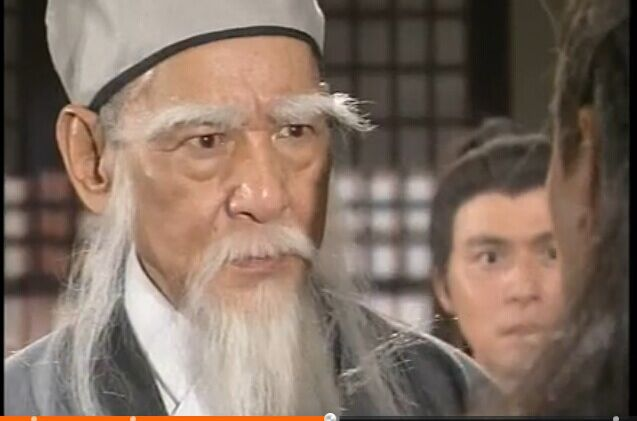


# Q&A

# THANKS!